# GRIP @ THE SPARKS FOUNDATION

#### - Harsha Satsangi
#### - Data Science & Business Analytics Intern

# Exploratory Data Analysis - Retail (Level - Beginner)

* Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'
* As a business manager, try to find out the weak areas where you can
work to make more profit.
* What all business problems you can derive by exploring the data?
* Dataset Link - https://bit.ly/3i4rbWl

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SampleSuperstore.csv", encoding = "unicode_escape")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### 1) Different ship modes present in the dataset

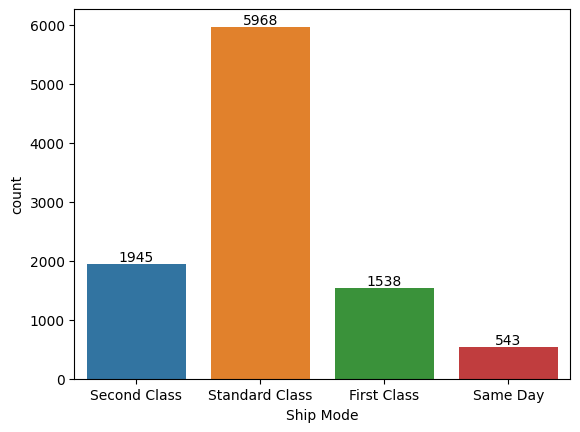

In [4]:
inputx = df["Ship Mode"]
graph = sns.countplot(x = inputx, data = df, hue = "Ship Mode")

for bar in graph.containers:
    plt.bar_label(bar)
plt.show()



### 2) Unique segments are there in the dataset

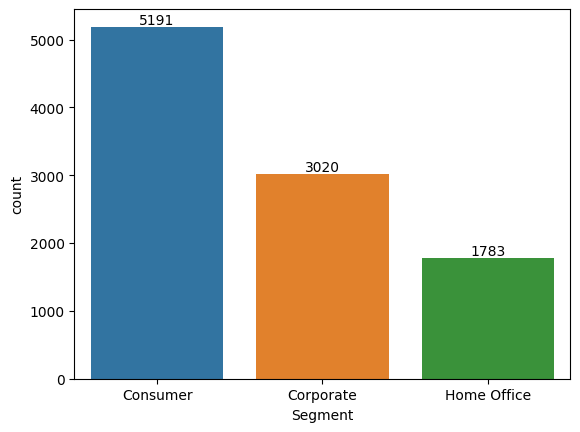

In [5]:
inputx = df["Segment"]
graph = sns.countplot(x = inputx, data = df, hue = "Segment")

for bars in graph.containers:
    plt.bar_label(bars)
plt.show()

### 3) Countries are included in the dataset

In [6]:
df.Country.unique()

array(['United States'], dtype=object)

### 4) What is the range of postal codes in the dataset?

In [7]:
x, y = (df["Postal Code"].max(), df["Postal Code"].min())
x, y

(99301, 1040)

### 5) Cities have the highest sales

In [8]:
new_df = df.groupby(["City"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False)
new_df

,City,Sales
329,New York City,256368.161
266,Los Angeles,175851.341
452,Seattle,119540.742
438,San Francisco,112669.092
374,Philadelphia,109077.013
...,...,...
354,Ormond Beach,2.808
370,Pensacola,2.214
221,Jupiter,2.064
140,Elyria,1.824


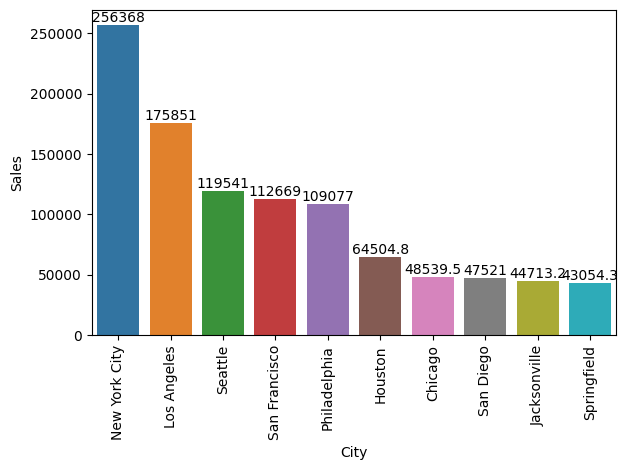

In [9]:
new_df = df.groupby(["City"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False).head(10)
graph = sns.barplot(x = "City", y = "Sales", data = new_df, hue = "City")
plt.xticks(rotation = "vertical")
for bars in graph.containers:
    plt.bar_label(bars)
plt.tight_layout()
plt.show()


 ### 6) Top 10 lowest sales Cities

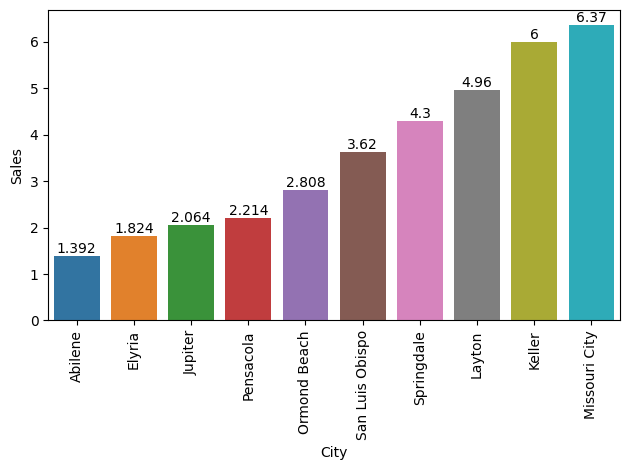

In [10]:
new_df = df.groupby(["City"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = True).head(10)
graph = sns.barplot(x = "City", y = "Sales", data = new_df, hue = "City")
plt.xticks(rotation = "vertical")
for bars in graph.containers:
    plt.bar_label(bars)
plt.tight_layout()
plt.show()

### 7) States are covered in the dataset

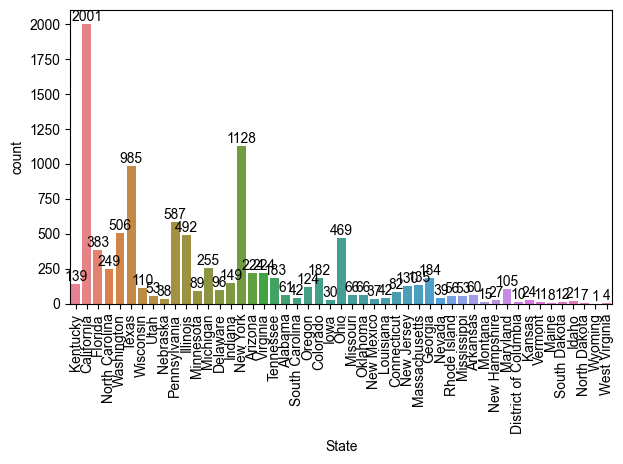

In [11]:
inputx = df["State"]
graph = sns.countplot(x = inputx, data = df, hue = "State")

plt.xticks(rotation = "vertical")
for bars in graph.containers:
    plt.bar_label(bars)
sns.set(rc={'figure.figsize':(20,10)})
plt.tight_layout()
plt.show()

In [12]:
df.State.nunique()

49

### 8) Can you identify the regions represented in the data?

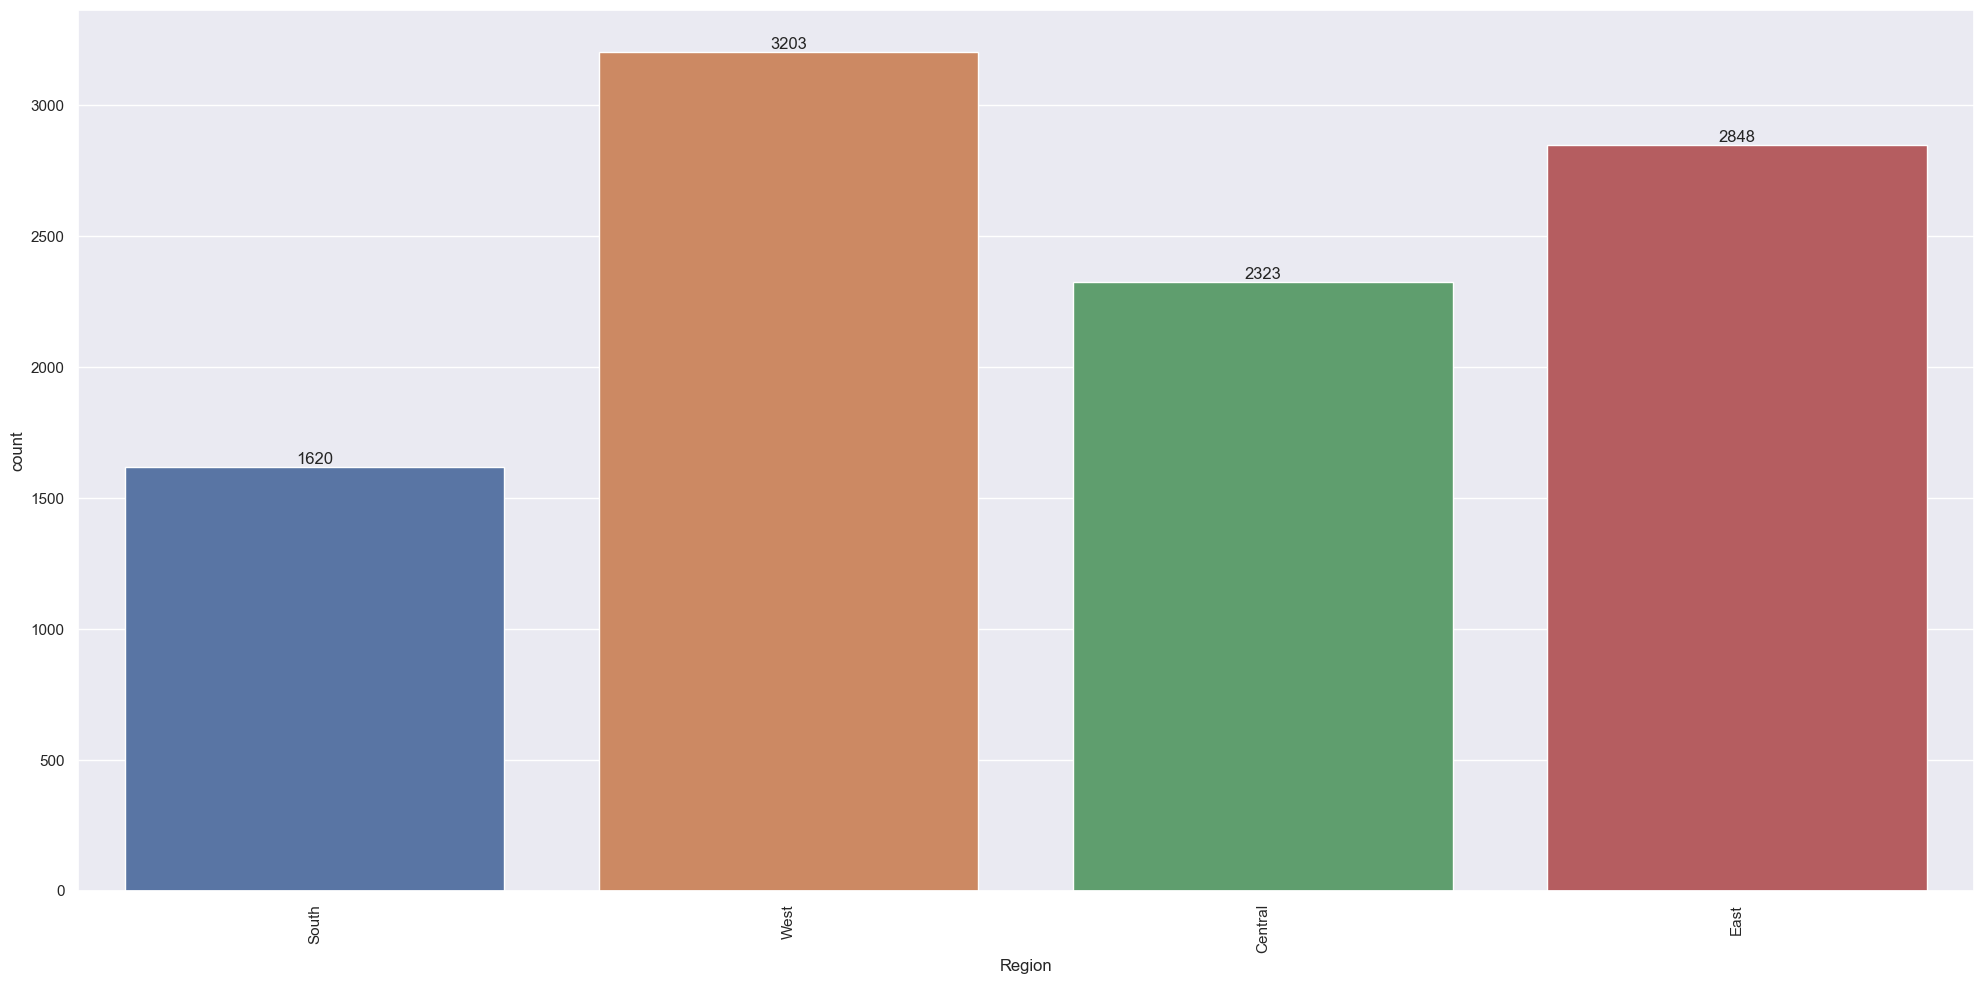

In [13]:
inputx = df["Region"]
graph = sns.countplot(x = inputx, data = df, hue = "Region")

plt.xticks(rotation = "vertical")
for bars in graph.containers:
    plt.bar_label(bars)

plt.tight_layout()
plt.show()

### 9) What categories of products are available in the dataset?

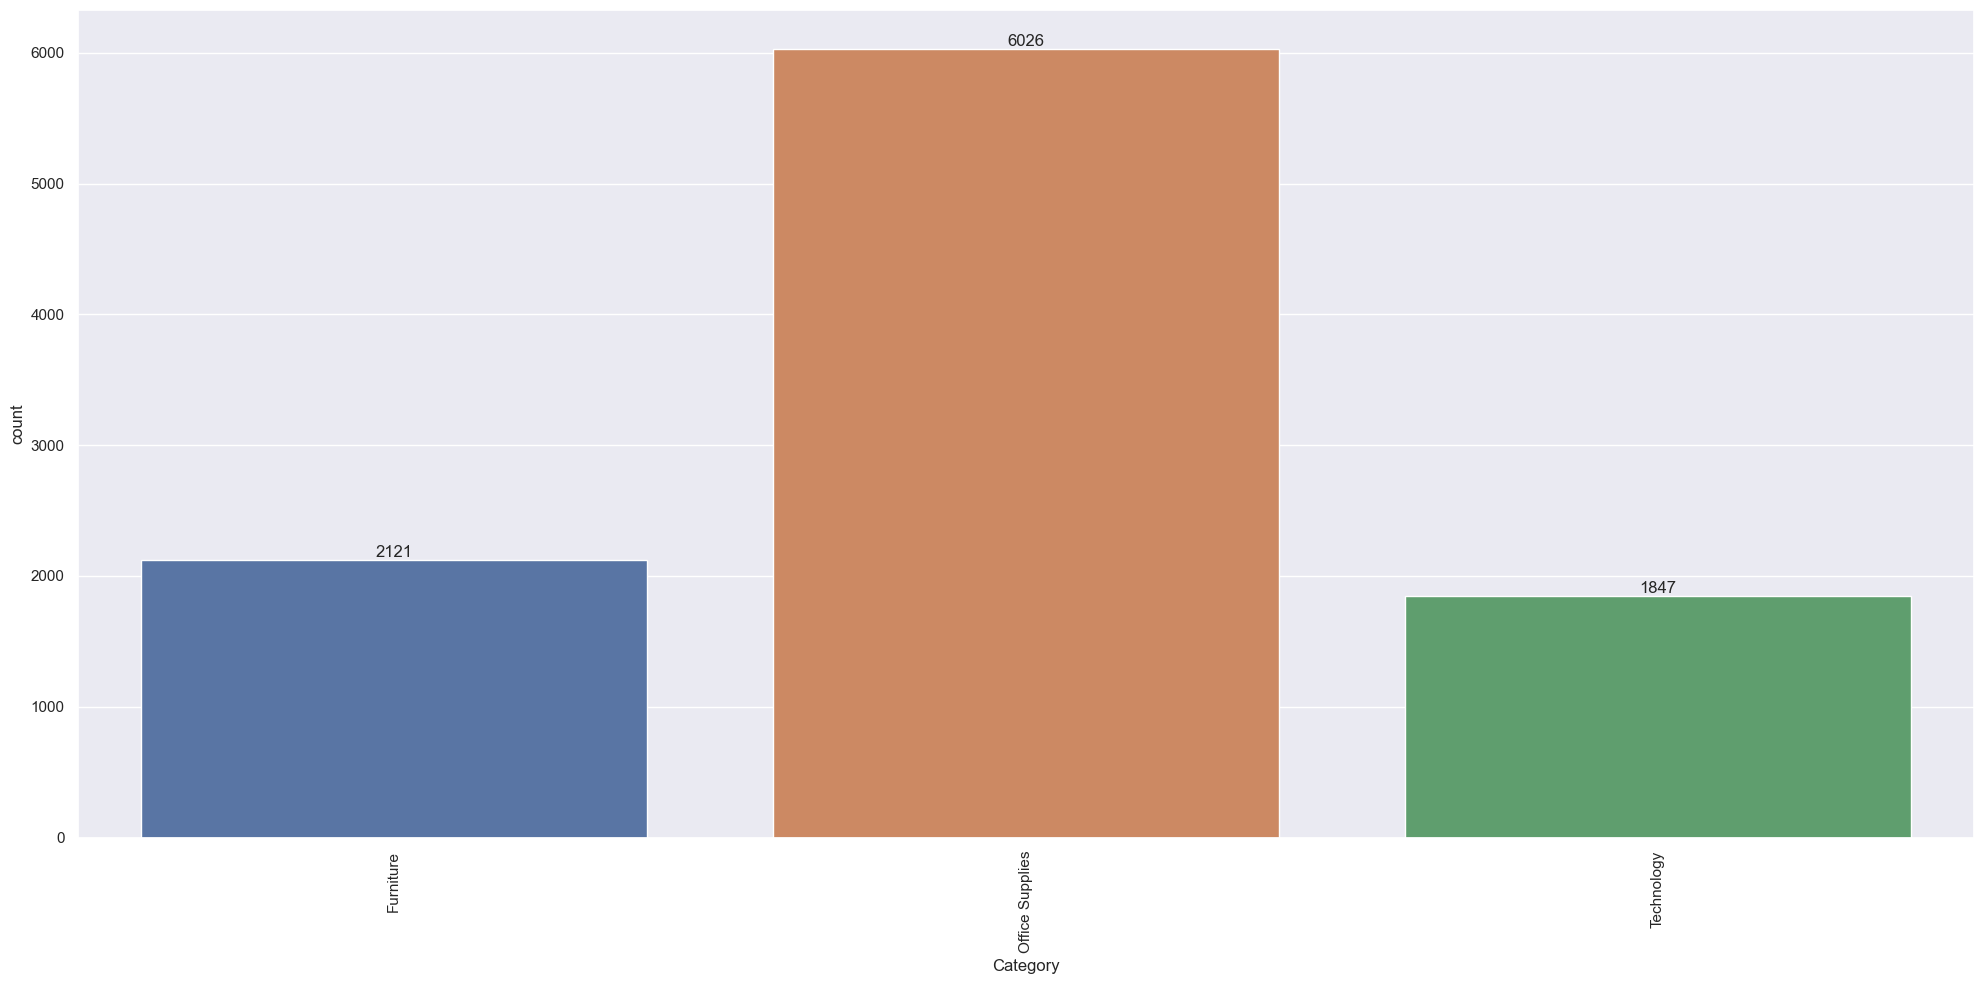

In [14]:
inputx = df["Category"]
graph = sns.countplot(x = inputx, data = df, hue = "Category")

plt.xticks(rotation = "vertical")
for bars in graph.containers:
    plt.bar_label(bars)

plt.tight_layout()
plt.show()

### 10) What sub-categories are present in the dataset?


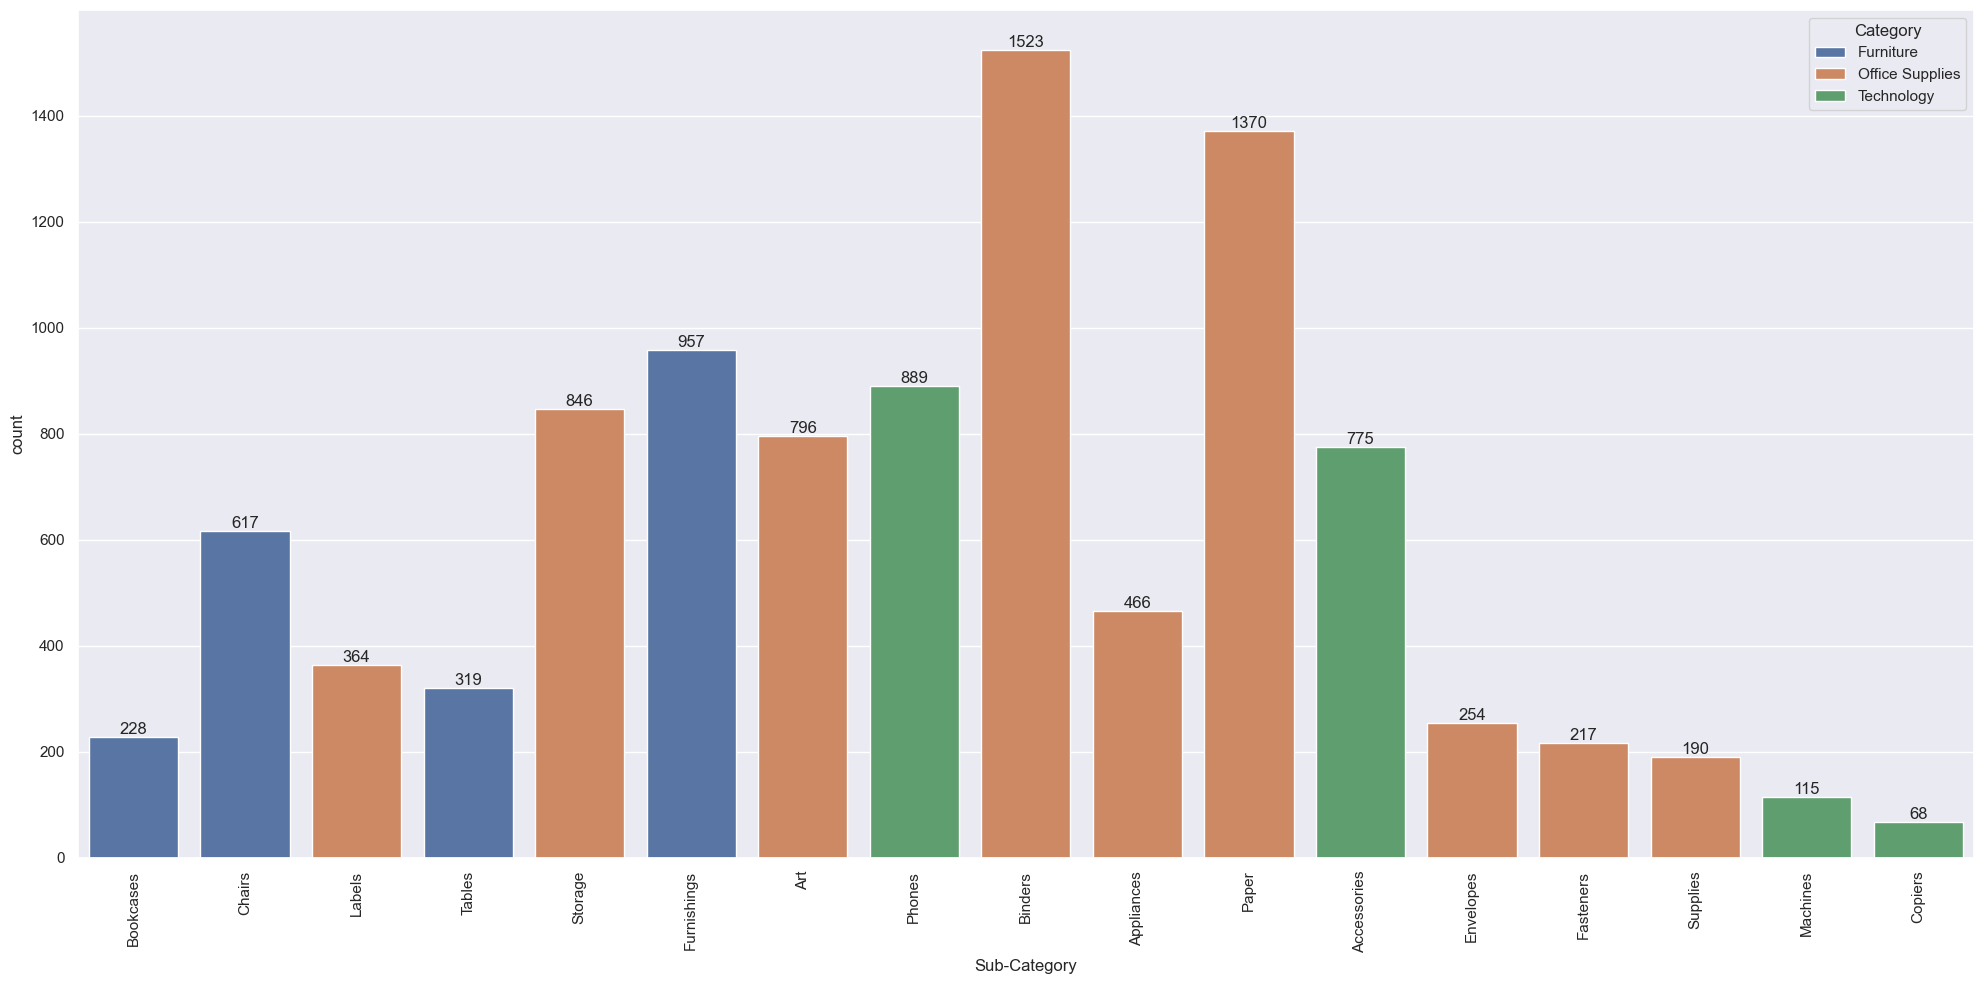

In [15]:
inputx = df["Sub-Category"]
graph = sns.countplot(x = inputx, data = df, hue = "Category")

plt.xticks(rotation = "vertical")
for bars in graph.containers:
    plt.bar_label(bars)

plt.tight_layout()
plt.show()

In [24]:
df["Sub-Category"].nunique()

17

### 11) What is the total sales recorded in the dataset?


In [16]:
Total_Sales = df.Sales.sum()
Total_Sales

2297200.8603000003

### 12) How many units of products were sold in total?

In [17]:
Total_Quantity = df.Quantity.sum()
Total_Quantity

37873

<Axes: xlabel='Sub-Category', ylabel='Quantity'>

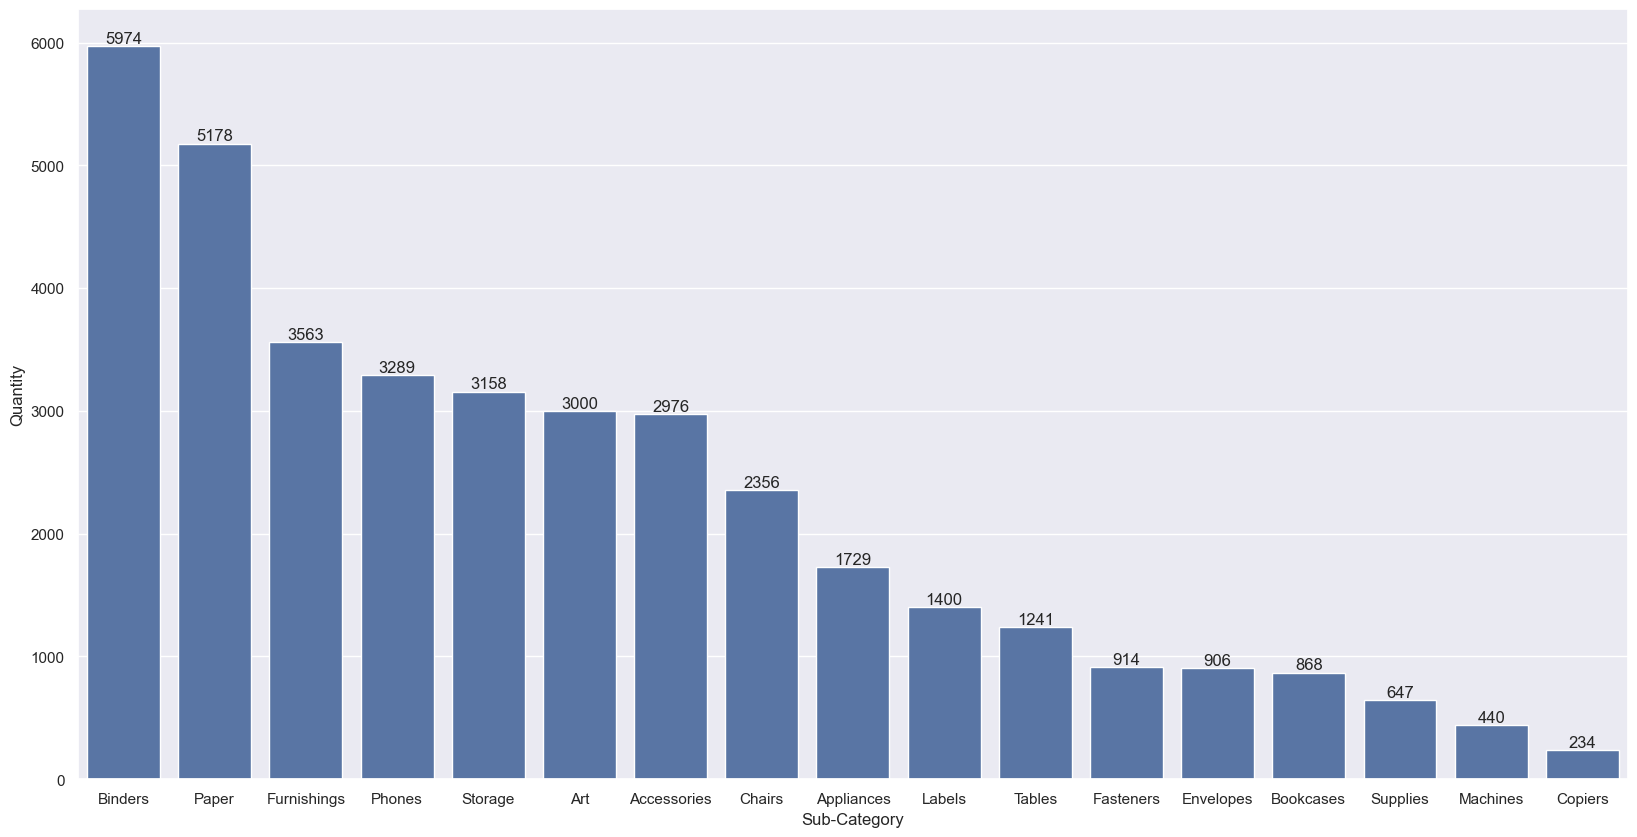

In [18]:
new_df = df.groupby(["Sub-Category"], as_index = False)["Quantity"].sum().sort_values(by = "Quantity", ascending = False)
graph = sns.barplot(x = "Sub-Category", y = "Quantity", data= new_df)
for bars in graph.containers:
    plt.bar_label(bars)
graph

### 13) What is the average discount offered on products?


In [19]:
average_discount = df["Discount"].mean()
average_discount * 100

15.620272163297976

### 14) Can you identify the most and least profitable entries in the dataset?


In [28]:
df[(df.Profit==df.Profit.max())]


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.976


In [29]:
df[(df.Profit==df.Profit.min())]


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.978


### 15) Is there any correlation between quantity sold and profit?


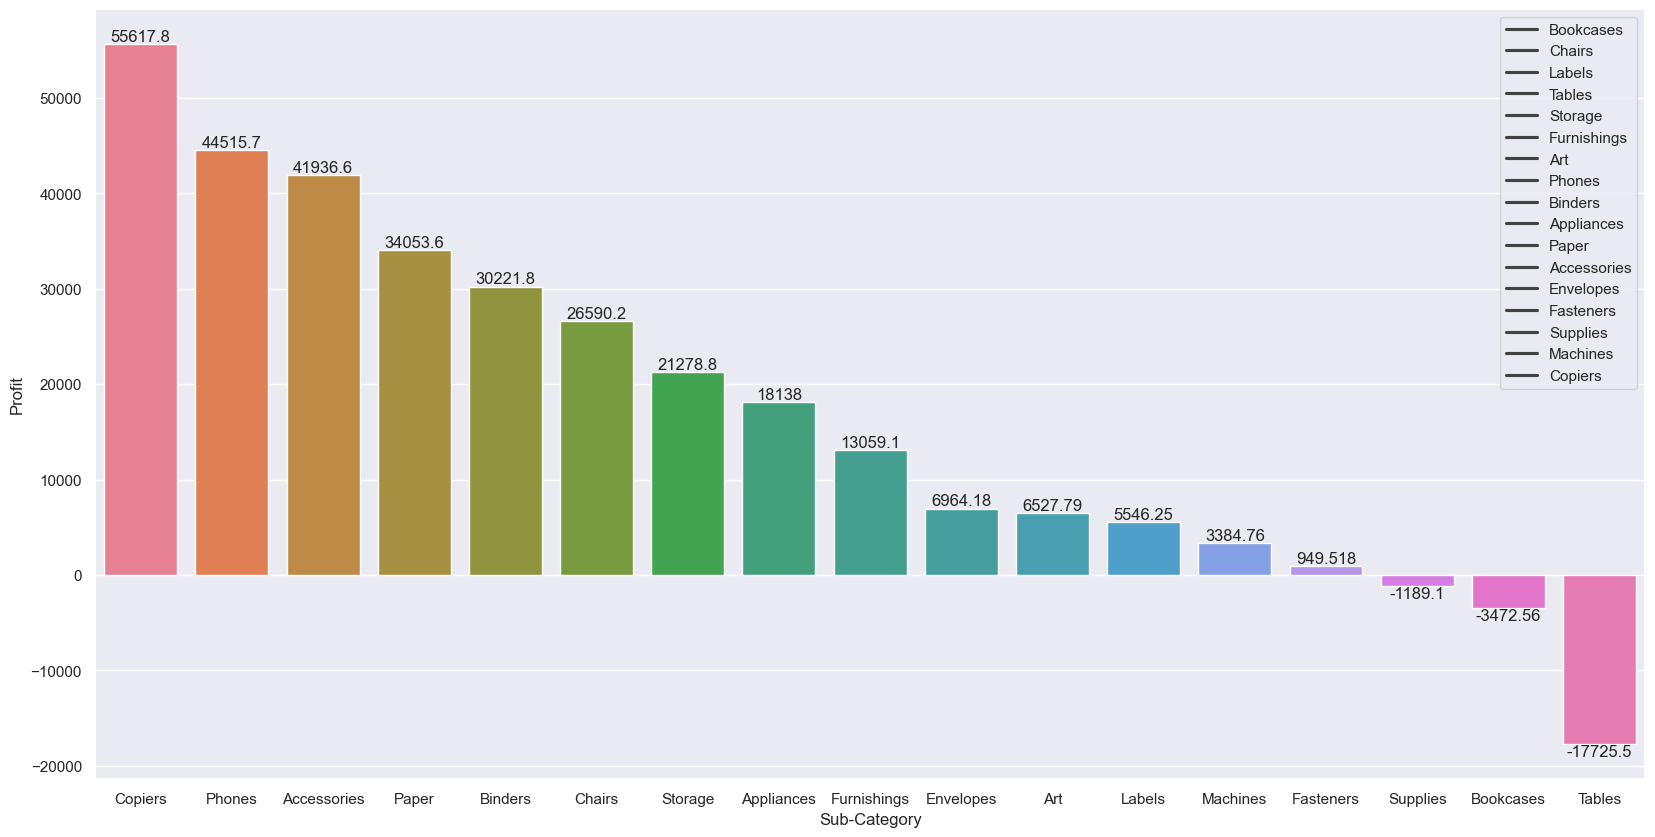

In [30]:
new_df = df.groupby(["Sub-Category"], as_index = False)[["Quantity", "Profit"]].sum().sort_values(by = "Profit", ascending = False)
graph = sns.barplot(x = "Sub-Category", y = "Profit", data= new_df,hue='Sub-Category')
legend = df['Sub-Category'].unique()
plt.legend(legend)
for bars in graph.containers:
    plt.bar_label(bars)

### 16) What is the distribution of sales across different regions?

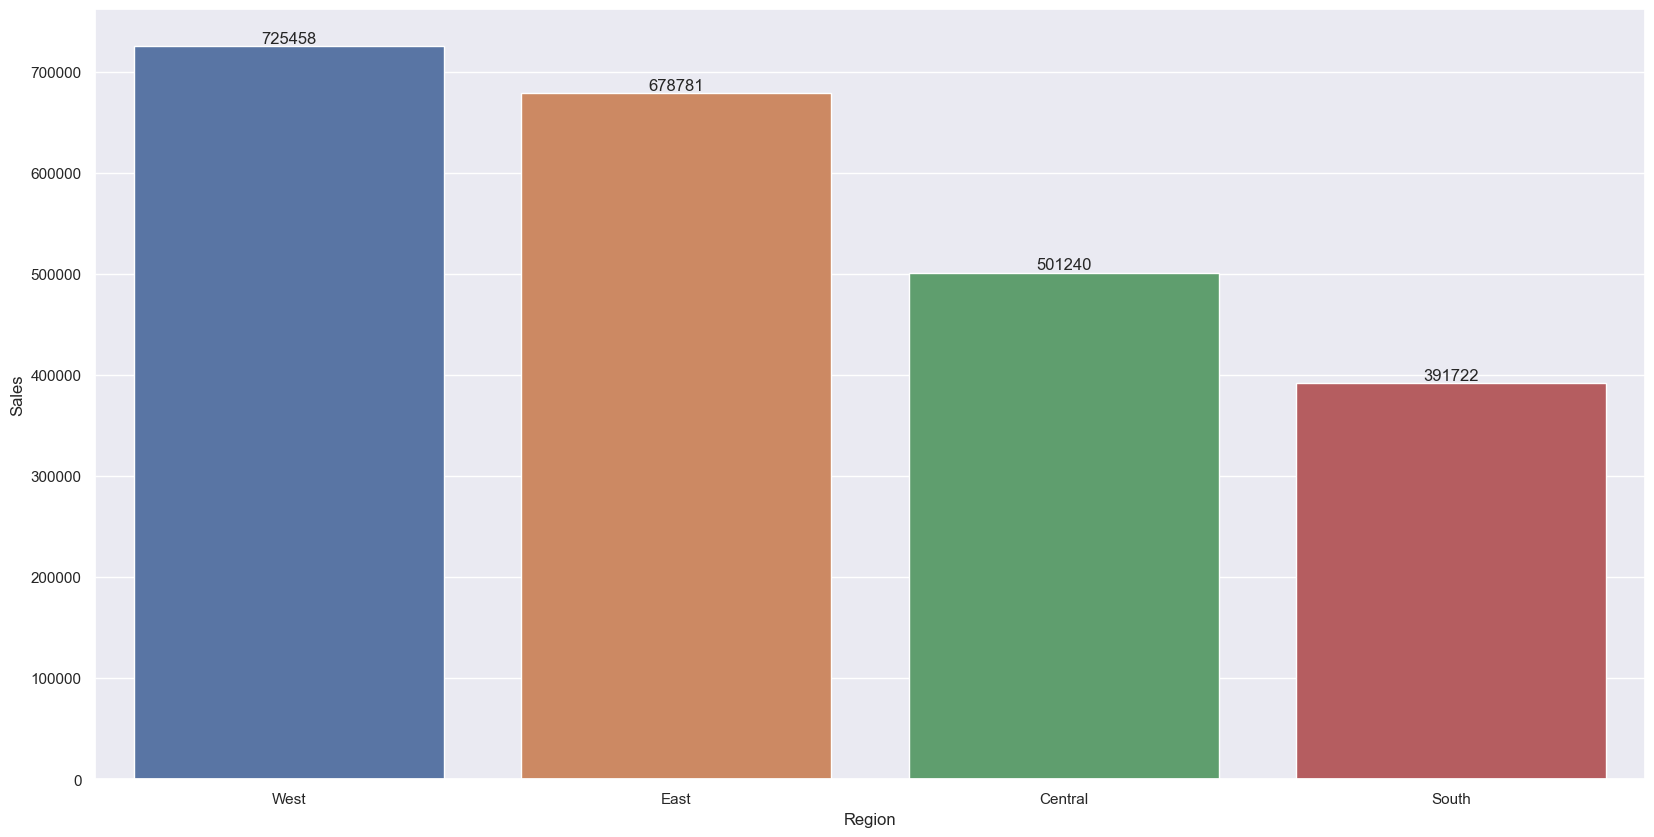

In [22]:
new_df = df.groupby(["Region"], as_index = False)["Sales"].sum().sort_values(by = "Sales", ascending = False)
graph = sns.barplot(x = "Region", y = "Sales", data = new_df, hue = "Region")
for bars in graph.containers:
    plt.bar_label(bars)
    

## Observations

*  Our dataset comprises 9994 entries and encompasses 13 columns of diverse information.
*  The available shipping modes include standard class, second class, first class, and same day. Notably, the standard class witnessed the highest volume of deliveries.
*  Segments in the dataset include consumer, corporate, and home office, with consumer deliveries dominating the segment distribution.
*  Originating from the United States, the dataset spans postal codes from 1040 to 99301.
*  New York leads in sales, with Los Angeles and Seattle following closely behind.
*  Conversely, Abilene ranks lowest in sales, trailed by Elyria and Jupiter.
*  The dataset encompasses 49 states, with California contributing the maximum number of deliveries.
*  Four regions are represented: south, west, central, and east. The west region accounts for the highest number of deliveries.
*  Product categories include furniture, office supplies, and technology, with office supplies having the highest delivery count.
*  With 17 sub-categories, binders emerge as the most popular, while copiers are the least favored.
*  The total sales recorded in the dataset amount to $2,297,200.86.
*  A total of 37,873 units of products were sold.
*  The average discount offered on products is 15.62%.
*  The most profitable entry generated a profit of 8,399.98 USD, while the least profitable entry incurred a loss of -6,599.98 USD.
*  The copiers sub-category proves to be the most profitable, whereas tables emerge as the least lucrative.
*  Sales peak in the west region, while the south region records the lowest sales.

## Conclusion


   * Analyze the profitability across different shipping modes, especially focusing on the standard class, which has the highest volume of deliveries. Evaluate whether this high volume translates to higher or lower profits compared to other shipping modes.


   * Investigate profitability within different segments, such as consumer, corporate, and home office. Identify if there are particular segments that contribute more significantly to profits and focus on optimizing strategies for those segments.


   * Explore the profitability trends in different regions and states. While New York leads in sales, profitability might vary across regions. Assess whether certain regions contribute more to overall profits and if there are opportunities to enhance profitability in less profitable regions.


   * Conduct a detailed analysis of profitability within each product category (furniture, office supplies, technology). Identify which categories are more lucrative and concentrate efforts on optimizing product offerings, pricing, and marketing in those categories.
   * Specifically, delve into sub-categories to understand why binders are the most popular and copiers are the most profitable. Assess if there are opportunities to increase profitability in less favored sub-categories like tables.


   * Assess the impact of the average discount offered on overall profitability. Evaluate whether adjusting the discount strategy could lead to improved profitability without sacrificing sales volume.


   * Examine the relationship between sales volume and profitability. While high sales in the west region have been noted, ensure that the profitability aligns with the sales figures. If not, identify areas where costs can be optimized without compromising on sales.


   * Analyze the most and least profitable entries to understand the factors influencing their profitability. Identify patterns, outliers, or specific characteristics that contribute to higher or lower profits.


   * Focus on entries that incurred losses and develop strategies to mitigate losses, whether through cost optimization, pricing adjustments, or other operational improvements.


   * Develop strategies to enhance overall profitability, considering the insights gained from shipping modes, segments, geographic regions, product categories, discount strategies, and individual entries. This could involve refining marketing approaches, optimizing supply chain operations, or introducing new products in high-profit categories.

 